In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [118]:
df = pd.read_csv('E:/CSE303/dataset/cars_raw.csv')

In [119]:
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head(5)

Dataset shape: (9379, 32)
Columns: ['Year', 'Make', 'Model', 'Used/New', 'Price', 'ConsumerRating', 'ConsumerReviews', 'SellerType', 'SellerName', 'SellerRating', 'SellerReviews', 'StreetName', 'State', 'Zipcode', 'DealType', 'ComfortRating', 'InteriorDesignRating', 'PerformanceRating', 'ValueForMoneyRating', 'ExteriorStylingRating', 'ReliabilityRating', 'ExteriorColor', 'InteriorColor', 'Drivetrain', 'MinMPG', 'MaxMPG', 'FuelType', 'Transmission', 'Engine', 'VIN', 'Stock#', 'Mileage']


,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137


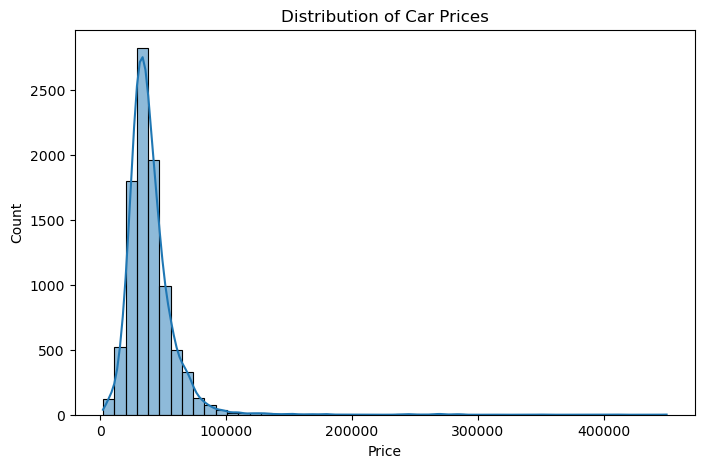

In [143]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [121]:
missing_counts = df.isnull().sum().sort_values(ascending=False)
print(missing_counts[missing_counts > 0])


DealType    222
dtype: int64


In [122]:
print((df['Price'] == 'Not Priced').sum(), "listings have 'Not Priced' as price.")


5 listings have 'Not Priced' as price.


In [123]:
df = df[df['Price'] != 'Not Priced'].copy()
print("Removed 'Not Priced' entries. New shape:", df.shape)

df['Price'] = df['Price'].str.replace(r'[\$,]', '', regex=True).astype(int)
print("Price dtype after conversion:", df['Price'].dtype)

Removed 'Not Priced' entries. New shape: (9374, 32)
Price dtype after conversion: int64


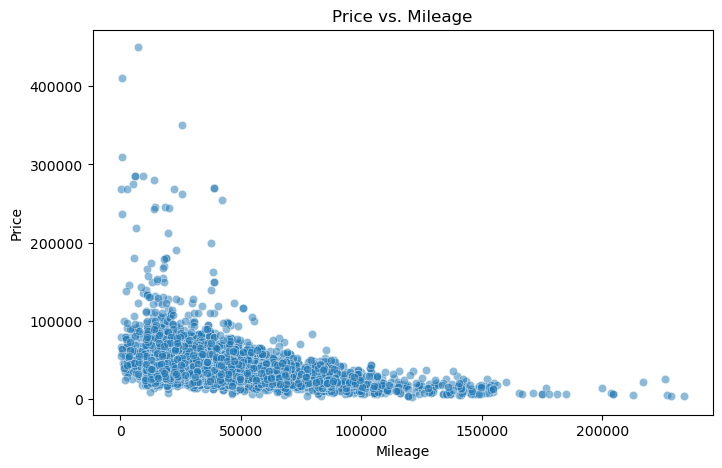

In [124]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Mileage', y='Price', alpha=0.5)
plt.title('Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

In [125]:
df.drop('DealType', axis=1, inplace=True)

In [126]:
print("Remaining missing values:\n", df.isnull().sum())

Remaining missing values:
 Year                     0
Make                     0
Model                    0
Used/New                 0
Price                    0
ConsumerRating           0
ConsumerReviews          0
SellerType               0
SellerName               0
SellerRating             0
SellerReviews            0
StreetName               0
State                    0
Zipcode                  0
ComfortRating            0
InteriorDesignRating     0
PerformanceRating        0
ValueForMoneyRating      0
ExteriorStylingRating    0
ReliabilityRating        0
ExteriorColor            0
InteriorColor            0
Drivetrain               0
MinMPG                   0
MaxMPG                   0
FuelType                 0
Transmission             0
Engine                   0
VIN                      0
Stock#                   0
Mileage                  0
dtype: int64


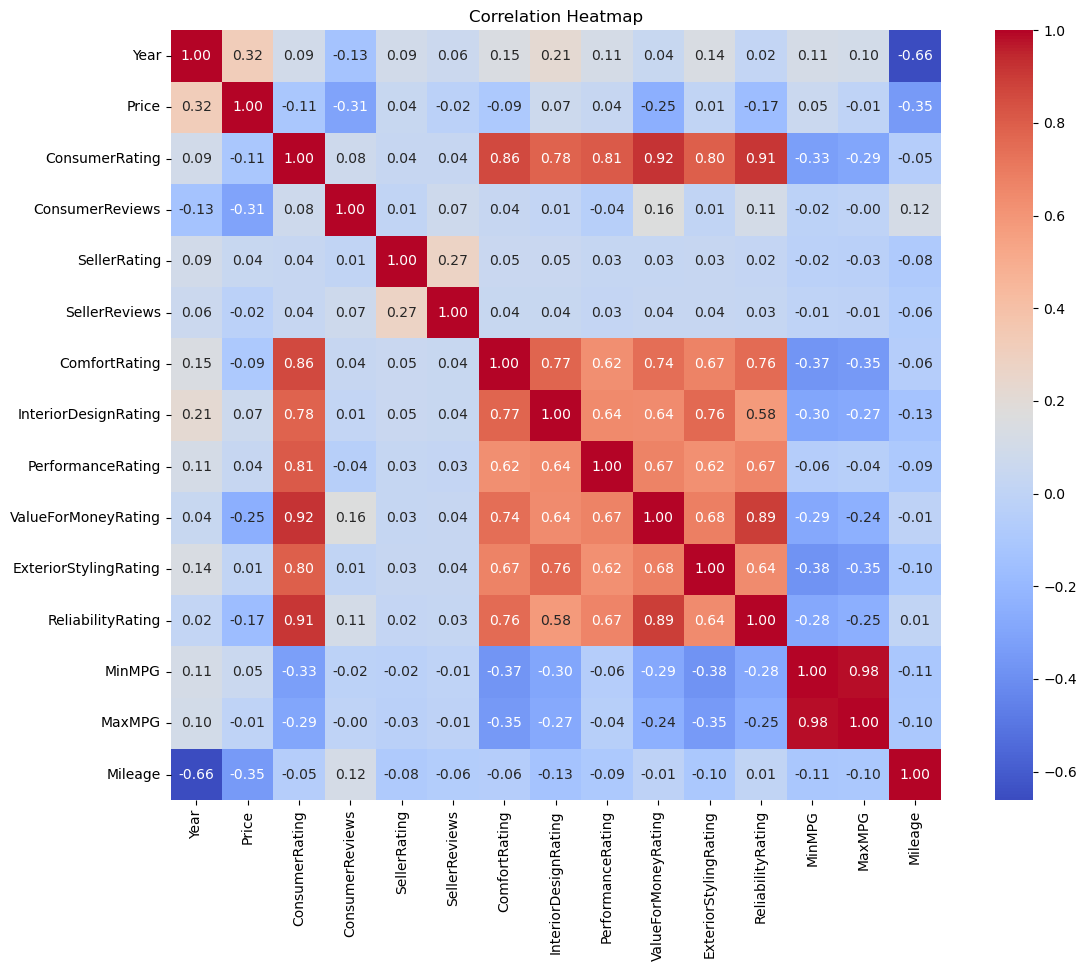

In [127]:
plt.figure(figsize=(14, 10))
numeric_cols = df.select_dtypes(include='number').columns
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [128]:
model_counts = df['Model'].value_counts()
rare_threshold = 5
df['Model_mod'] = df['Model'].apply(lambda m: m if model_counts[m] >= rare_threshold else 'Other')
print("Unique model categories after grouping:", df['Model_mod'].nunique())

df.drop('Model', axis=1, inplace=True)


Unique model categories after grouping: 421


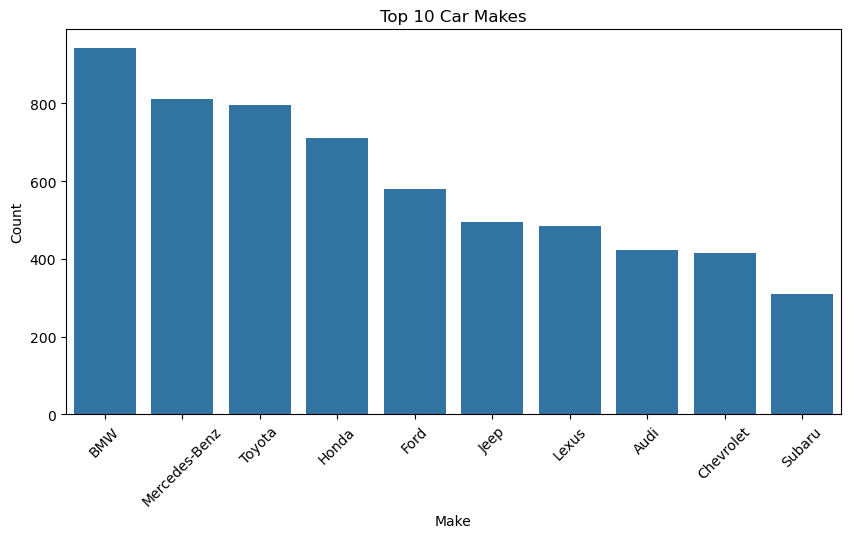

In [129]:
plt.figure(figsize=(10, 5))
top_makes = df['Make'].value_counts().nlargest(10).index
sns.countplot(data=df[df['Make'].isin(top_makes)], x='Make', order=top_makes)
plt.title('Top 10 Car Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [130]:
valid_states = { 'AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','IA','ID','IL','IN','KS','KY','LA','MA','MD','ME','MI','MN','MO','MS','MT','NC','ND','NE','NH','NJ','NM','NV','NY','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VA','VT','WA','WI','WV','WY','DC' }
df['State'] = df['State'].apply(lambda x: x if x in valid_states else 'Other')

In [131]:
df.head(5)

,Year,Make,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,...,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage,Model_mod
0,2019,Toyota,Used,39998,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,3,...,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403,Other
1,2018,Ford,Used,49985,4.8,817,Dealer,Giant Chevrolet,4.8,131,...,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929,F-150 Lariat
2,2017,RAM,Used,41860,4.7,495,Dealer,Gill Auto Group Madera,4.6,249,...,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173,1500 Laramie
3,2021,Honda,Used,28500,5.0,36,Dealer,AutoSavvy Las Vegas,4.6,284,...,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598,Other
4,2020,Lexus,Used,49000,4.8,76,Dealer,Lexus of Henderson,4.8,4755,...,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137,RX 350


In [132]:
cols_to_drop = [
    'SellerName', 'StreetName', 'Zipcode', 'ExteriorColor',
    'InteriorColor', 'Engine', 'VIN', 'Stock#'
]

df.drop(cols_to_drop, axis=1, inplace=True)

In [133]:
categorical_cols = ['Make','Model_mod','Used/New','SellerType',
                    'State','Drivetrain','FuelType','Transmission']

df_dummies = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Data shape after one-hot encoding:", df_dummies.shape)

Data shape after one-hot encoding: (9374, 664)


In [134]:
df_dummies.head()

,Year,Price,ConsumerRating,ConsumerReviews,SellerRating,SellerReviews,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,...,Transmission_automatic,Transmission_continuously variable (cvti s),Transmission_continuously variable w/sport mode,Transmission_driver adaptive 7 speed automatic,Transmission_sport automatic,Transmission_xtronic continuously variable (cvt),Transmission_xtronic cvt,Transmission_xtronic cvt (continuously variable),Transmission_xtronic cvt automatic,Transmission_–
0,2019,39998,4.6,45,3.3,3,4.7,4.6,4.6,4.4,...,False,False,False,False,False,False,False,False,False,False
1,2018,49985,4.8,817,4.8,131,4.9,4.8,4.8,4.6,...,False,False,False,False,False,False,False,False,False,False
2,2017,41860,4.7,495,4.6,249,4.8,4.7,4.8,4.6,...,False,False,False,False,False,False,False,False,False,False
3,2021,28500,5.0,36,4.6,284,4.9,5.0,4.9,5.0,...,False,False,False,False,False,False,False,False,False,False
4,2020,49000,4.8,76,4.8,4755,4.9,4.8,4.8,4.7,...,False,False,False,False,False,False,False,False,False,False


In [135]:
X = df_dummies.drop('Price', axis=1)
y = df_dummies['Price']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape, "Test set size:", X_test.shape)

Training set size: (7499, 663) Test set size: (1875, 663)


In [137]:
numeric_features = ['Year','Mileage','ConsumerRating','ConsumerReviews','SellerRating','SellerReviews',
                    'ComfortRating','InteriorDesignRating','PerformanceRating','ValueForMoneyRating',
                    'ExteriorStylingRating','ReliabilityRating','MinMPG','MaxMPG',
                    'Engine_displacement','Engine_cylinders']

numeric_features = [col for col in numeric_features if col in X_train.columns]

scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In [138]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

lr_r2 = r2_score(y_test, y_test_pred)
lr_mae = mean_absolute_error(y_test, y_test_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Linear Regression - Test R²: {:.3f}".format(lr_r2))
print("Linear Regression - Test MAE: ${:.0f}".format(lr_mae))
print("Linear Regression - Test RMSE: ${:.0f}".format(lr_rmse))


Linear Regression - Test R²: 0.544
Linear Regression - Test MAE: $4953
Linear Regression - Test RMSE: $14122


In [139]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_test_pred_ridge = ridge_model.predict(X_test)

ridge_r2 = r2_score(y_test, y_test_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_test_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

print("Ridge Regression - Test R²: {:.3f}".format(ridge_r2))
print("Ridge Regression - Test MAE: ${:.0f}".format(ridge_mae))
print("Ridge Regression - Test RMSE: ${:.0f}".format(ridge_rmse))

Ridge Regression - Test R²: 0.681
Ridge Regression - Test MAE: $4568
Ridge Regression - Test RMSE: $11818


In [140]:
lasso_model = Lasso(alpha=1.0, max_iter=10000)
lasso_model.fit(X_train, y_train)

y_test_pred_lasso = lasso_model.predict(X_test)

lasso_r2 = r2_score(y_test, y_test_pred_lasso)
lasso_mae = mean_absolute_error(y_test, y_test_pred_lasso)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

print("Lasso Regression - Test R²: {:.3f}".format(lasso_r2))
print("Lasso Regression - Test MAE: ${:.0f}".format(lasso_mae))
print("Lasso Regression - Test RMSE: ${:.0f}".format(lasso_rmse))

Lasso Regression - Test R²: 0.674
Lasso Regression - Test MAE: $4486
Lasso Regression - Test RMSE: $11942


In [141]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression (L2)', 'Lasso Regression (L1)'],
    'Test R²': [lr_r2, ridge_r2, lasso_r2],
    'Test MAE ($)': [lr_mae, ridge_mae, lasso_mae],
    'Test RMSE ($)': [lr_rmse, ridge_rmse, lasso_rmse]
})
results.round(3)

,Model,Test R²,Test MAE ($),Test RMSE ($)
0,Linear Regression,0.544,4953.278,14121.554
1,Ridge Regression (L2),0.681,4567.604,11818.236
2,Lasso Regression (L1),0.674,4485.780,11941.539


In [142]:
print("Lasso kept {} out of {} features.".format(
    (lasso_model.coef_ != 0).sum(), len(lasso_model.coef_)))

Lasso kept 515 out of 663 features.
